# Data visualisation in Python
Today we will devote the workshop to a single topic - how to generate plots in Python. We use the main plotting module, `matplotlib`, and touch on an extension which simplifies _some_ aspects, called `seaborn`. In this workshop it can help to have a reference to the matplotlib documentation open at all times, you can find this here: https://matplotlib.org/stable/api/index.html

There are also a series of cheatsheets to help you:

* [Beginner](https://matplotlib.org/cheatsheets/_images/handout-beginner.png) (start here)
* [Intermediate](https://matplotlib.org/cheatsheets/_images/handout-intermediate.png)
* [Additional hints and tips](https://matplotlib.org/cheatsheets/_images/handout-tips.png)

* [Overview](https://matplotlib.org/cheatsheets/_images/cheatsheets-1.png)
* [Colours and annotations](https://matplotlib.org/cheatsheets/_images/cheatsheets-2.png)

Remember, the take-home is not to memorise every line of code, but to __develop your programming skills__. This is where computational thinking really helps to decompose a problem then build up the solution piece by piece. Top help further hone your skills there are numerous tutorials you can follow in your own time: https://matplotlib.org/stable/tutorials/index


### In the beginning was the word, and the word was `Figure`
Recall from the lecture that the base of a plot is the `Figure` - think of this as your blank canvas, onto which you are going to paint your beautiful data plot. The `Figure` contains the `axes`, which include the type of plot, the x,y co-ordinates, grid lines and legends.

![Anatomy of a plot](anatomy_plot.webp)

In [13]:
import matplotlib.pyplot as plt # this helps with writing cleaner code
import matplotlib as mpl
import random # used to randomly generate values

import numpy as np # useful for holding data for plotting

In [3]:
# Create a base plot
fig = plt.Figure()
fig

<Figure size 640x480 with 0 Axes>

You can see that the returned object doesn't create a visual plot, that's because it contains 0 Axes. It does give you the size of the figure in inches, i.e. 6.40 x 4.80. We can adjust this when we create the figure.

In [6]:
# Create a bigger plot
fig = plt.Figure(figsize=(9.6, 9.6))
fig

<Figure size 960x960 with 0 Axes>

To be able to have a visual plot we need to add some `Axes` to it. Imagine the `Figure` is just the blank page, before your pencil touches it there is no plot - the `Axes` therefore represent what we draw on the page.

__BEWARE__ An `Axes` is __NOT__ the same as an `Axis` - the latter are the x and y axes of your plot, control the limits and the ticks while the `Axes` are the elements on the whole plot - confusing I know, but just be sure to check this.

To make our first plot we will need a bit of data to graph out - we can randomly generate some numbers using numpy. We will create 3 variables: a categorical one with 3 groups, an integer variable and float variable.

In [38]:
np.random.seed(42) # set the seed for random number generation to get the same values each time
groups = ["a", "b", "c"]
group_data =[random.choice(groups) for x in range(50)]
var_data = np.random.randn(50) # generate 50 random floats
int_data = np.random.randint(0, 50, 50) # generate 50 random integers between 0 and 50

In [39]:
# we can store these in a dict for now
plot_data = {"groups": group_data, "vars": var_data, "counts": int_data} # the names don't matter, just so they are vaguely informative

Although we created a blank figure above, in practise we define the number of `Axes` at the same time.

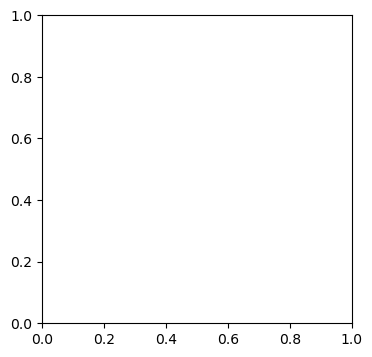

In [40]:
fig, ax = plt.subplots(figsize=(4, 4))

This time we generated a blank plot because we told `matplotlib` that we want one axis.

In [41]:
ax.plot(plot_data["groups"], plot_data["vars"])

So why didn't our plot show up? All we've done so far is to tell the computer what to put on the plot, we haven't told it to actually visualise it for us. To do that we use `plt.show()` <- get used to using this function to visualise your plots.

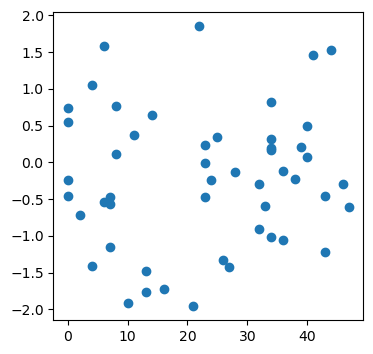

In [42]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(plot_data["counts"], plot_data["vars"])
plt.show()

__Exercise break__
Use the help() function to find out what other arguments the scatter() function can take - have a play around with these to alter some of the aesthetics of your plot.

## Tailoring plots to data
In practise we don't just want to generate scatter plots - they are great for visualising the relationship between 2 continuous variables, but what if we have categorical data that we also want to look at? As you've seen from Lecture 3, there are a wide range of other plot types that we can make using Python.

### Plotting data distributions
We often want to plot the distribution of our data, or look at how it varies between groups - boxplots, histograms and kernel density plots are great for this.

Note that everytime I want to make a new plot I make a call to `plt.subplots()`, the plot type `Axes` and `plt.show()` <- get used to doing this as standard. We'll talk about how to make multi-panel or multi-layered plots later.

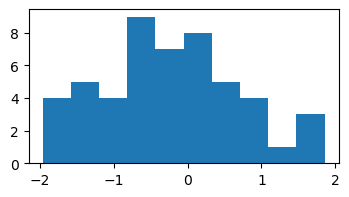

In [43]:
fig, ax = plt.subplots(figsize=(4, 2))
ax.hist(plot_data["vars"], bins=10)
plt.show()

A histogram plots the distribution of your data by counting the frequency of data points that fall into discrete bins along the range of the data.

The format for a boxplot is an array or sequence of vectors (i.e. lists). Therefore, we need to put our data into that format for each group before we plot it. This highlights (a) the need to read the function documentation, and (b) don't assume that the interface is simple and intuitive.

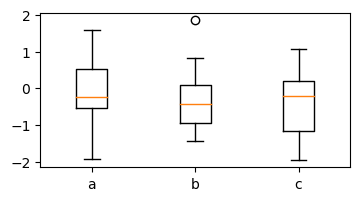

In [69]:
a_data = []
b_data = []
c_data = []
group_data = plot_data["groups"]
group_data.sort() # to get lexographical order

for x in range(len(group_data)):
    if group_data[x] == "a":
        a_data.append(plot_data["vars"][x])
    elif group_data[x] == "b":
        b_data.append(plot_data["vars"][x])
    elif group_data[x] == "c":
        c_data.append(plot_data["vars"][x])

box_data = [a_data, b_data, c_data]
        
fig, ax = plt.subplots(figsize=(4, 2))
ax.boxplot(box_data, labels=["a", "b", "c"])
plt.show()

### Plotting categorical data
We can visualise how many data points we have in group using a bar graph. That means we need to count how many observations there are in each group.

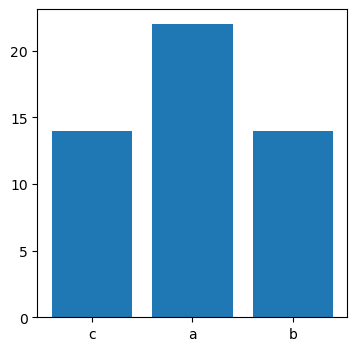

In [76]:
# get the unique values
bar_data = {}
group_data = plot_data["groups"]

for val in set(group_data): # set() gives the unique values
    val_list = [x for x in plot_data["groups"] if x == val]
    bar_data[val] = len(val_list)

    
fig, ax = plt.subplots(figsize=(4, 4))
ax.bar(bar_data.keys(), bar_data.values())
plt.show()

__Exercise break__
Can you figure out how to change the colours of the bar chart? Hint: use help(ax.bar) and the cheatsheets to help you. Can you make each bar a different colour?

# Axes labels and tick (Axis)
Matplotlib automatically creates ticks and axis for plots, but sometimes these aren't useful or aren't quite what we want. Therefore, we can change how these look, for instance removing ticks or changing the axis scales.


Recall our scatter plot from earlier, what if we want to visualise our data on a log scale - how would we do that?

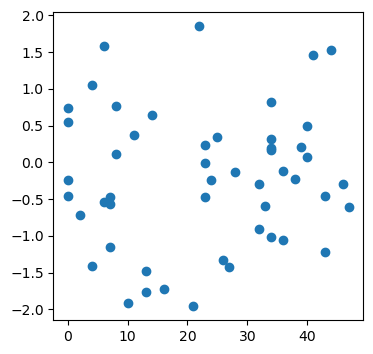

In [78]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(plot_data["counts"], plot_data["vars"])
ax.set_yscale('linear')
plt.show()

This hasn't changed anything because the default is to plot on a linear scale - now try it with a log scale.

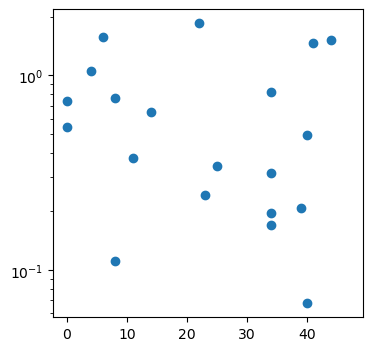

In [79]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(plot_data["counts"], plot_data["vars"])
ax.set_yscale('log')
plt.show()

The plot show look quite different - the actual range of the data aren't huge so logging the values doesn't make a massive difference to their distribution. However, if you had some values in the hundreds or thousands you would start to notice the difference.

In [72]:
random.seed(42)
big_range = [random.uniform(-1000, 100000) for x in range(50)]

fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(plot_data["counts"], big_range)
ax.set_yscale('linear')
plt.show()

NameError: name 'random' is not defined

The y-axis data go from -1000 to +10000 and it can be hard to find patterns in data with this sort of range, for intance all the values that are negative look like they are actually zero. Plotting on a log scale shows us the differences more clearly.

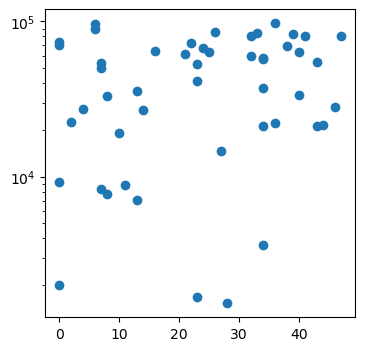

In [94]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(plot_data["counts"], big_range)
ax.set_yscale('log')
plt.show()

The tick marks on the y-axis are widely spaced - what if we want to see the rest of the range starting at 0?

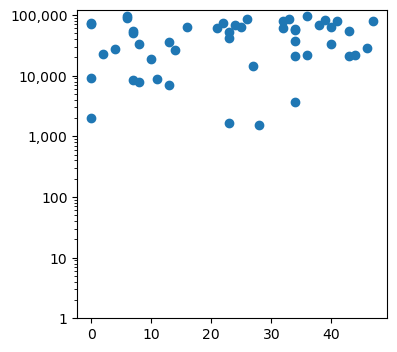

In [105]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(plot_data["counts"], big_range)
ax.set_yscale('log')
ax.set_yticks([1, 1e1, 1e2, 1e3, 1e4, 1e5]) # change the ticks on the plot
ax.set_yticklabels(["1", "10", "100", "1,000", "10,000", "100,000"]) # change the appearance of the labels
plt.show()

__Exercise break__
Try changing some of the other aspects of the axis ticks and labels - more information can be found in the documentation: https://matplotlib.org/stable/api/ticker_api.html For instance, why not try adding and removing the minor and major ticks?

[Bonus: can you figure out how to add grid lines to your plot?](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.grid.html#matplotlib.axes.Axes.grid)

## Figure legends
A plot is only as informative as its legend. Legends provide additional information that help the reader interprete a plot, so they can be very important.

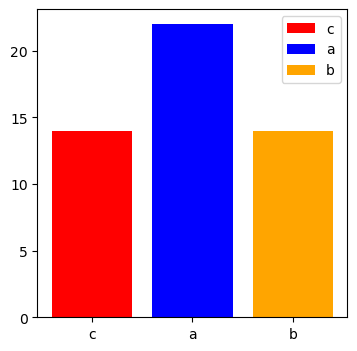

In [118]:
# get the unique values
bar_data = {}
group_data = plot_data["groups"]

for val in set(group_data): # set() gives the unique values
    val_list = [x for x in plot_data["groups"] if x == val]
    bar_data[val] = len(val_list)

    
fig, ax = plt.subplots(figsize=(4, 4))
ax.bar(bar_data.keys(), bar_data.values(),
       color=['red', 'blue', 'orange'],
       label=bar_data.keys())
ax.legend()
plt.show()

You can alter the position of a legend, and how it is arranged to prevent over-plotting.

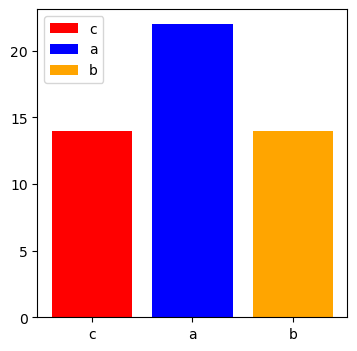

In [121]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.bar(bar_data.keys(), bar_data.values(),
       color=['red', 'blue', 'orange'],
       label=bar_data.keys())
ax.legend(loc="upper left")
plt.show()

Check the documentation for more ideas on how to adjust figure legends: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend

# Multi-panel plots
We often want to create multiple plots in the same figure - you can even create multiple figures at once, you just need to give the `Figure` and `Axes` variables different names.

We will use `plt.subplots` as before, but note with multi-panel figures we actually have an array of `Axes` now, so to add the plot types and adjust the aesthetics then we need to index the specific `Axes`.

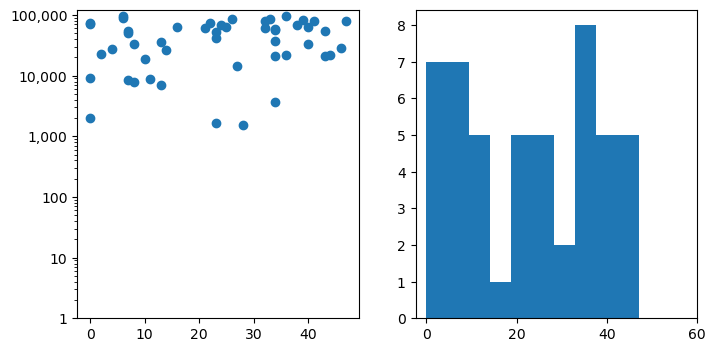

In [110]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(8, 4))
ax[0].scatter(plot_data["counts"], big_range) # add to index 0 - the 1st plot
ax[0].set_yscale('log')
ax[0].set_yticks([1, 1e1, 1e2, 1e3, 1e4, 1e5]) # change the ticks on the plot
ax[0].set_yticklabels(["1", "10", "100", "1,000", "10,000", "100,000"]) # change the appearance of the labels

ax[1].hist(plot_data["counts"])
ax[1].set_yscale('linear')
ax[1].set_xticks([0, 20, 40, 60]) # change the ticks on the plot

plt.show()

# Reading data from a file
We've already seen how we can read data from a tab or comma-separated file into a data frame using `pandas`. Sometimes data don't come in that nice friendly format, so we need other ways to read in data. Thankfully this is fairly straight forward in Python, but it does require you to pay careful attention to what format the file is read in. That is because each _line_ of a file is read separately, until you get to the end of a file. This good practise of iteration and flow control, as well as string manipulation.

There are 2 styles for opening files in Python - one is definitely better than the other, but it is important to understand why.

The first is to do:
```
file_ = open("file path")
*read in lines*
*do some stuff*
file_.close()
```

You MUST close the file, otherwise it is left hanging open and you won't be able to access it again.

The second (better) is:
```
with open("file path") as file_:
    *read in lines*
    *do some stuff*
```

The second approach doesn't need you to explictly close the file. At the end of the `with` statement it will be closed automatically.

In [129]:
file_data = []

test_file = open("read_a_file.txt")
lines = test_file.readlines() # this reads all of the lines at once into memory
for xline in lines:
    xline = xline.rstrip("\n") # remove the trailing newline character
    file_data.append(xline)
    
# we have to close the file
test_file.close()
file_data

['ATGACGCCTCATTGCGCGGTAGTACAGACCGACAATGCCCCGTCTGAATGCATACACCTAAGACATTATCATAAAGGACGTGGTAGAGCATCAACTCGCCTTTGCTTTCTCGCGAGCTGTTCGTCCGACGTGGCATGGATCGTTGATAGTGGGCGCATGTCTAGCTCTTACATGGGAAGCCACGCCAAGACTGGATGCATGTACCTAAATGCCGCGCCCCGAGGCACCGAACCGACAGTGGGAGCGAAAGTCCGAGTGTCCAATCAAGCCTTAGAGACGTCAGCCCCCTATTGGGTACTTAATGAACAGAATGTAACCGGTGATCAAAAATACCGC',
 'ATGCTTCTCCGGCTCGCCAACTTCCCCGGGGCAGAGGGTCAGGGAAAGAGTTCTTCATTCCAACATGATACCATACCCACAACAGCTAGCTCTTCGGTATTTACCATTTCGTTCCACACCTTGCTTATTAAACGCAATGGTGAATTGTTCTCGTCTACTCTACATACGTCGCCCTGTAGTAGTGCATTGGTCCGCAAACGGTACAATAGCCTTGACACACACGAGCTGCGACTTACAGGATGTGACATCAATCCGTCCATTGACCTCCAGTGCATGGTATTCGCAGGAGCTCAGAGCATTGAGACGGAAAATAGCAAGACGTGGGCGTTTTTACAA',
 'ATGGCTTGTAGGAGTCCCACCCCTGAGTTAAGAGCCCTACGGTTAGTTCGAGCGCAGGCACTACCTGTGCGGCTGTTAGGTGTTCTCCTGTCACTGAATGGGATAACGCAGGCAGCCGACATTGGTGAACAACAGGCTGAAGCTAAACATGTCGGTTACGTGACCCCTAGTAATCATCAACTCGGGCTATGCGAAATACCTAACGTATTTTTATGTACGGGGCTGAGAGTCTGGCGAGCGTTCCTGTCAGAGTGCCAGACCTGTAGGGAATCCATCCAACCGTTTCGCACAGGACCCATATTGGTTAGTATGTTTT

In [135]:
with open("read_a_file.txt") as test_file:
    lines2 = test_file.readlines()
    test_data2 = [lx.rstrip("\n") for lx in lines2] # this is called a list comprehension - very useful in Python
    
print(test_data2)

['ATGACGCCTCATTGCGCGGTAGTACAGACCGACAATGCCCCGTCTGAATGCATACACCTAAGACATTATCATAAAGGACGTGGTAGAGCATCAACTCGCCTTTGCTTTCTCGCGAGCTGTTCGTCCGACGTGGCATGGATCGTTGATAGTGGGCGCATGTCTAGCTCTTACATGGGAAGCCACGCCAAGACTGGATGCATGTACCTAAATGCCGCGCCCCGAGGCACCGAACCGACAGTGGGAGCGAAAGTCCGAGTGTCCAATCAAGCCTTAGAGACGTCAGCCCCCTATTGGGTACTTAATGAACAGAATGTAACCGGTGATCAAAAATACCGC', 'ATGCTTCTCCGGCTCGCCAACTTCCCCGGGGCAGAGGGTCAGGGAAAGAGTTCTTCATTCCAACATGATACCATACCCACAACAGCTAGCTCTTCGGTATTTACCATTTCGTTCCACACCTTGCTTATTAAACGCAATGGTGAATTGTTCTCGTCTACTCTACATACGTCGCCCTGTAGTAGTGCATTGGTCCGCAAACGGTACAATAGCCTTGACACACACGAGCTGCGACTTACAGGATGTGACATCAATCCGTCCATTGACCTCCAGTGCATGGTATTCGCAGGAGCTCAGAGCATTGAGACGGAAAATAGCAAGACGTGGGCGTTTTTACAA', 'ATGGCTTGTAGGAGTCCCACCCCTGAGTTAAGAGCCCTACGGTTAGTTCGAGCGCAGGCACTACCTGTGCGGCTGTTAGGTGTTCTCCTGTCACTGAATGGGATAACGCAGGCAGCCGACATTGGTGAACAACAGGCTGAAGCTAAACATGTCGGTTACGTGACCCCTAGTAATCATCAACTCGGGCTATGCGAAATACCTAACGTATTTTTATGTACGGGGCTGAGAGTCTGGCGAGCGTTCCTGTCAGAGTGCCAGACCTGTAGGGAATCCATCCAACCGTTTCGCACAGGACCCATATTGGTTAGTATGTTTTCC

Notice how the second way leads to cleaner code that is less error prone. This is a form of _defensive programming_ that we will discuss in the last lecture.

What about a file that isn't just a sequence on each line? Although it might be invisible to us certain character spacing will appear in a text file. We've already seen the newline character `\n` - this tells the computer that is the end of that line. Other separator characters might be a comma `,` or a tab `\t`. The `\` is an escape character that tells the computer not to interpret the `t` value literally.

There are also 2 different ways to read the file contents. We used the `readlines()` function to put all of the file contents into memory. We could alternatively use the `readline()` function, that reads in one line at a time. We would then need to iterate through the file to retrieve each new line. Can you think of why we might want to do this instead of reading the whole file into memory?

__Exercise break__
You have been given a file - can you identify the separator, and can you read in the lines of the file. What container do you think would be good to store this data? Think about what you learnt in the last workshop.

# An easier way to make plots?
Matplotlib is a very powerful and flexible way to generate plots; have a look at the [gallery to see what is possible](https://matplotlib.org/stable/gallery/index.html). For data analysis and visualisation there are some convenient modules that help to simplify things - we will have a look at [seaborn](https://seaborn.pydata.org/).

Why didn't we start with that? Because `seaborn` is based on matplotlib, so you still need to know how these plots are constructed to make your own.

In [139]:
import seaborn as sbn
import pandas as pd

In [142]:
plot_df = pd.DataFrame(plot_data) # seaborn uses a dataframe as a common input data format
plot_df.head()

,groups,vars,counts
0,a,0.496714,40
1,a,-0.138264,28
2,a,0.647689,14
3,a,1.523030,44
4,a,-0.234153,0


<Axes: xlabel='groups', ylabel='vars'>

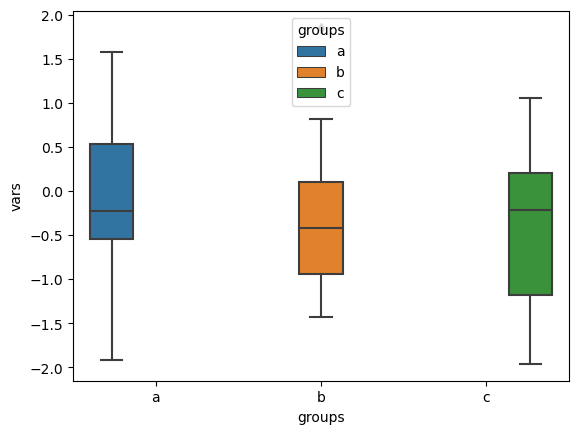

In [145]:
# make a boxplot
sbn.boxplot(plot_df, x="groups", y="vars", hue="groups")

Making multi-panel plots is also easier with seaborn - you can also still change the `Axes` to set labels, ticks, etc.

We'll start with multi-panel plots with shared axes, i.e. either x or y are the same.

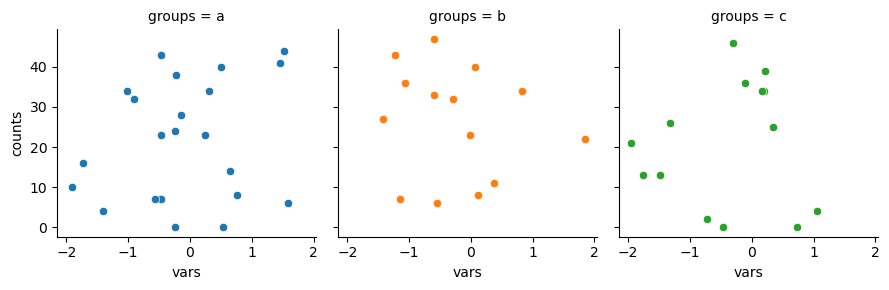

In [155]:
facet = sbn.FacetGrid(plot_df, col="groups", hue="groups")
facet.map(sbn.scatterplot, "vars", "counts")
plt.show()

The limitiation is here is that we have to have the same plot, and are only graphing out the values for the different categories. What about a figure that has multiple panels with different plots? Simply you pass the indexed `Axes` object to the `ax` argument of the plotting function.

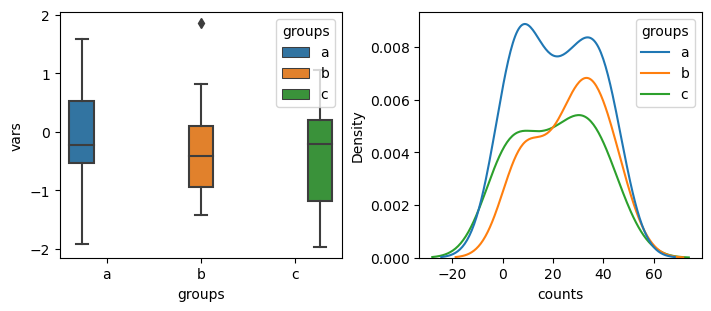

In [163]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(7, 3), layout="constrained")
sbn.boxplot(plot_df, x="groups", y="vars", hue="groups", ax=ax[0])
sbn.kdeplot(plot_df, x="counts", hue="groups", ax=ax[1])
plt.show()

For slightly fancier plots where each panel is a different size you can use the [`plot.subplot_mosaic()` function](https://matplotlib.org/stable/users/explain/quick_start.html#working-with-multiple-figures-and-axes) as below.

Instead of using numerical indices, the positions of the plots are given `keys` just like a dictionary.

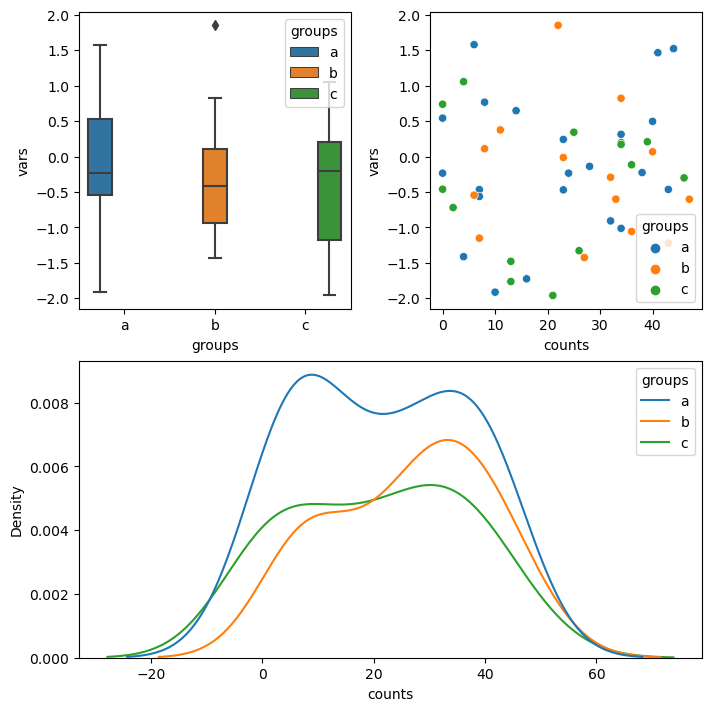

In [165]:
fig, ax = plt.subplot_mosaic([["box", "scatter"],["hist", "hist"]], 
                             figsize=(7, 7), layout="constrained")
sbn.boxplot(plot_df, x="groups", y="vars", hue="groups", ax=ax["box"])
sbn.scatterplot(plot_df, x="counts", y="vars", hue="groups", ax=ax["scatter"])
sbn.kdeplot(plot_df, x="counts", hue="groups", ax=ax["hist"])
plt.show()

__Final exercise__
You have been provided with a file containing some data on different homologs of RAS genes. Use what you have learn't so far to read this file into Python and create some plots to explore the data. I want you to create a multi-panel plot containing a boxplot, histogram and scatter plot of the data. Each group level must have a different colour, and the scatter plot axes must be on a log scale.
